# Analyze results

In [1]:
import utils.analysis_functions as af
import json 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

import utils.dataset as dataset


# Retest Récidive Locale


In [2]:
params = dataset.load_config("settings.yaml")
folder_path = params['paths']['data_folder_path']
outcome_csv = params['paths']['outcome_csv_file']
results_file = params['paths']['results_file']   
delta_rad_tables = params['paths']['delta_rad_tables']
outcomes_list = params['parameters']['outcomes_list']
feat_sel_algo_list = params['parameters']['feat_sel_algo_list']
pred_algo_list = params['parameters']['pred_algo_list']
results = pd.read_json(results_file)
results_dict = json.load(open(results_file))
print(results_dict.keys())  
print(pred_algo_list)
print(feat_sel_algo_list)

dict_keys(['simu_mridian_gtv.csv', 'f1_gtv.csv', 'f3_gtv.csv', 'f5_gtv.csv', 'rd_simu_f1_gtv.csv', 'rd_simu_f3_gtv.csv', 'rd_simu_f5_gtv.csv', 'rd_f1_f3_gtv.csv', 'rd_f1_f5_gtv.csv'])
['RF']
['ANOVA_K_BEST']


# Compare one algo with different metrics and CI

In [3]:
pred_algo = "RF"
feat_sel_algo = "ANOVA_K_BEST"
inter_res = results['simu_mridian_gtv.csv'][feat_sel_algo][pred_algo]['Récidive Locale']
#for table in delta_rad_tables: 
for nb_features in inter_res.keys():
    print(nb_features, inter_res[nb_features]['features'])
    print("Train AUC: ", np.mean(inter_res[nb_features]['train_metrics']['auc']['values']))

    # print()
    # print(inter_res[nb_features]['test_metrics']['sensitivity']['conf_int'])
    # print(inter_res[nb_features]['test_metrics']['specificity']['conf_int'])
    # print(inter_res[nb_features]['test_metrics']['brier_loss']['conf_int'])
    print(inter_res[nb_features]['test_metrics']['auc'])
    print("Test AUC: {} ({}; {})".format(np.mean(inter_res[nb_features]['test_metrics']['auc']['values']), 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['auc']['conf_int']), axis=0)[0], 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['auc']['conf_int']), axis=0)[1]))
    print("Test Brier loss: {} ({}; {})".format(np.mean(inter_res[nb_features]['test_metrics']['brier_loss']['values']), 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['brier_loss']['conf_int']), axis=0)[0], 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['brier_loss']['conf_int']), axis=0)[1]))

    print('')
    # , 

1 ['original_shape_Elongation']
Train AUC:  0.7224496877870716
{'values': [0.541380853588975, 0.543774420854637, 0.47231101325553804, 0.897872941447959, 0.588823550323011], 'conf_int': [[0.192307692307692, 0.8571428571428571], [0.24375000000000002, 0.7916666666666661], [0.152211538461538, 0.884615384615384], [0.636363636363636, 1.0], [0.08863636363636301, 0.9287499999999981]]}
Test AUC: 0.6088325558940241 (0.2626538461538458; 0.892434981684981)
Test Brier loss: 0.2614731947137172 (0.182559037352773; 0.3442876976290575)

2 ['original_shape_Elongation', 'original_firstorder_Kurtosis']
Train AUC:  0.7473012702999102
{'values': [0.544478092740592, 0.370069823793228, 0.380329755392569, 0.7658581260212091, 0.680843721565186], 'conf_int': [[0.152529761904761, 0.8500000000000001], [0.16666666666666602, 0.64621212121212], [0.0, 0.7677777777777771], [0.300480769230769, 1.0], [0.16602564102564102, 1.0]]}
Test AUC: 0.5483159039025568 (0.1571405677655674; 0.8527979797979794)
Test Brier loss: 0.2482

## Best AUC

In [3]:
top_results = af.get_best_results(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, 'Récidive Locale', metric='roc_auc', k = 5)

Top 5 results for each table and Récidive Locale in terms of roc_auc:
Top 5 mean results for table f1_gtv.csv:
Mean roc_auc: 0.8690476190476191, Prediction Algorithm: PSVM, Feature Selection Algorithm: RDM_SEL, Features: ['original_firstorder_Entropy', 'original_glszm_ZoneEntropy']
Mean roc_auc: 0.8392857142857141, Prediction Algorithm: DT, Feature Selection Algorithm: CHI2_K_BEST, Features: ['original_shape_Elongation', 'original_glrlm_GrayLevelNonUniformity']
Mean roc_auc: 0.833333333333333, Prediction Algorithm: PSVM, Feature Selection Algorithm: ADABOOST, Features: ['original_shape_Elongation']
Mean roc_auc: 0.833333333333333, Prediction Algorithm: PSVM, Feature Selection Algorithm: ANOVA_K_BEST, Features: ['original_shape_Elongation']
Mean roc_auc: 0.833333333333333, Prediction Algorithm: PSVM, Feature Selection Algorithm: CHI2_K_BEST, Features: ['original_shape_Elongation']


Top 5 mean results for table f5_gtv.csv:
Mean roc_auc: 0.833333333333333, Prediction Algorithm: MLP, Feat

## ROC comparison

KeyError: "['original_firstorder_Entropy'] not in index"

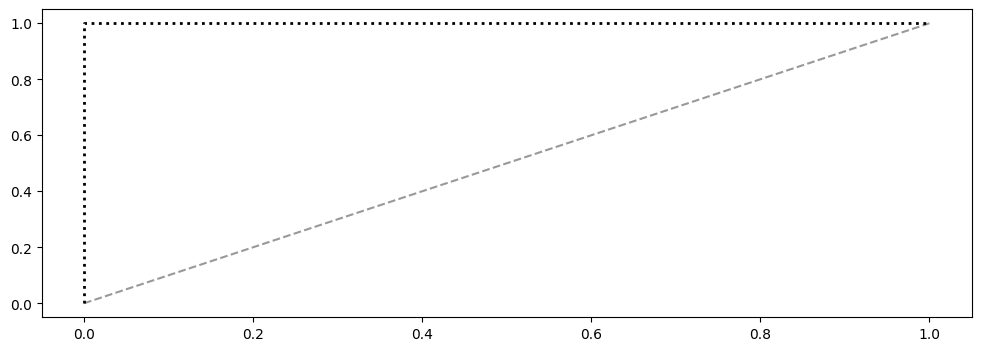

In [4]:
nice_tables = ['F1', 'F5', 'F1/F5', 'F1/F3', 'F1/F4']

af.compare_roc_auc(top_results, 'Récidive Locale', nice_tables, cval=False)

## Best spe & sens

In [ ]:
af.find_perf_alg(results, delta_rad_tables, ['Récidive Locale'], feat_sel_algo_list, pred_algo_list, threshold=0.7)

Table: f1_gtv.csv, Outcome: Récidive Locale, Feature Selection Algorithm: ADABOOST, Prediction Algorithm: MLP, Number of Features: 2, '
'                                       AUC: 0.63095238095238, Sensitivity: 0.75, Specificity: 0.7619047619047611, '
'                                       Features: ['original_shape_Elongation', 'original_glcm_MCC']
Table: f1_gtv.csv, Outcome: Récidive Locale, Feature Selection Algorithm: ADABOOST, Prediction Algorithm: MLP, Number of Features: 3, '
'                                       AUC: 0.6547619047619041, Sensitivity: 0.75, Specificity: 0.7142857142857141, '
'                                       Features: ['original_shape_Elongation', 'original_glcm_MCC', 'original_glcm_Imc2']
Table: f1_gtv.csv, Outcome: Récidive Locale, Feature Selection Algorithm: MI_PERC, Prediction Algorithm: ADABOOST, Number of Features: 1, '
'                                       AUC: 0.7142857142857141, Sensitivity: 0.75, Specificity: 0.7619047619047611, '
'        

## Boxplot

In [ ]:
rec_loc_top_res = af.get_best_results_dict(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, metric_list, 'Récidive Locale', k=10)
# make a boxplot of rec_loc_top_res, rec_meta_top_res, deces_top_res with 
plt.style.use('seaborn-v0_8')
widths = 0.1
medianprops = dict(linestyle='-', linewidth=1, color='red')



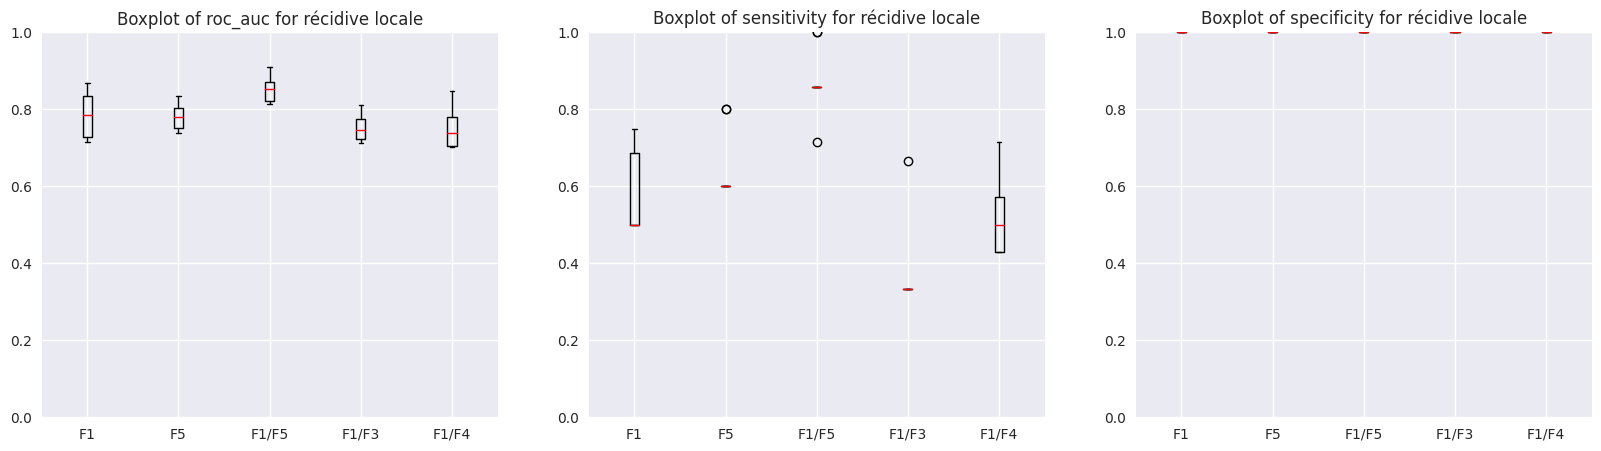

In [ ]:
plt.figure(figsize=(20, 5))
i = 1
for metric in metric_list: 
    value_by_table = rec_loc_top_res[metric]
    plt.subplot(1, 3, i), plt.boxplot(value_by_table.values(), widths=widths, medianprops=medianprops), plt.title(f'Boxplot of {metric} for récidive locale'), plt.ylim([0, 1]), plt.xticks(range(1, len(delta_rad_tables) + 1), nice_tables), 
    i += 1

## Thresholds

Table: f1_gtv.csv, Sensitivity: [0.25, 0.25, 0.5, 0.5, 0.75, 0.75, 1.0, 1.0], Specificity: [1.0, 0.8095238095238095, 0.8095238095238095, 0.6666666666666666, 0.6666666666666666, 0.3333333333333333, 0.3333333333333333, 0.0], Threshold: [0.5392597375782257, 0.29288291230350716, 0.2488510710607003, 0.2127294507046863, 0.17692694078494192, 0.12035670880390244, 0.11752684968281599, 0.09352468136818129]
Table: f5_gtv.csv, Sensitivity: [0.0, 0.2, 0.2, 0.4, 0.4, 1.0, 1.0], Specificity: [0.9444444444444444, 0.9444444444444444, 0.7777777777777778, 0.7777777777777778, 0.2222222222222222, 0.2222222222222222, 0.0], Threshold: [0.24144784310607406, 0.24050624650809285, 0.23256840490488623, 0.2320403751918403, 0.2224858565616469, 0.21284391872263916, 0.18070024694170247]
Table: rd_f1_f5_gtv.csv, Sensitivity: [0.0, 0.14285714285714285, 0.5714285714285714, 0.5714285714285714, 0.7142857142857143, 1.0, 1.0], Specificity: [0.9375, 0.9375, 0.75, 0.625, 0.5, 0.375, 0.0], Threshold: [0.76, 0.74, 0.62, 0.58, 0

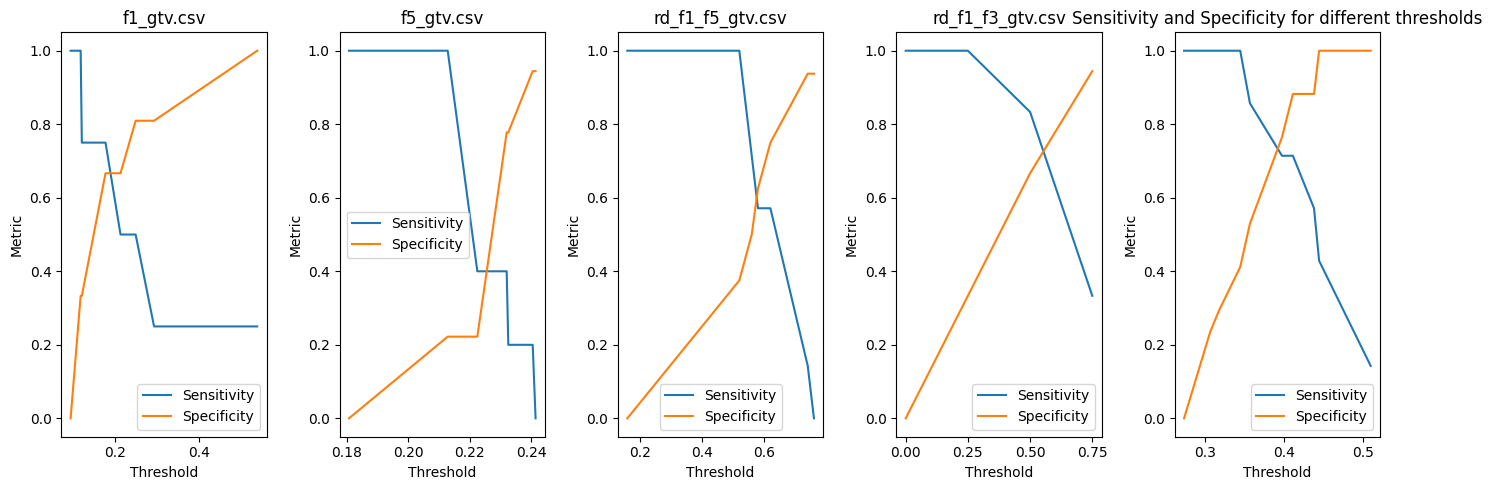

In [ ]:
af.compare_sens_spe(top_results, 'Récidive Locale', cval=False)

# Nested CV results

In [5]:
folder_path = '/home/tachennf/Documents/delta-rad/extracted_radiomics/'
delta_rad_tables = ['simu_mridian_gtv.csv', 'f1_gtv.csv', 'f3_gtv.csv', 'f5_gtv.csv', 'rd_simu_f1_gtv.csv', 'rd_simu_f3_gtv.csv', 'rd_simu_f5_gtv.csv', 'rd_f1_f3_gtv.csv', 'rd_f1_f5_gtv.csv'] # [] #  'simu_gtv.csv', 'f1_gtv.csv', 'f3_gtv.csv', 'f5_gtv.csv', 'rd_simu_f1_gtv.csv', 'rd_simu_f3_gtv.csv', 'rd_simu_f5_gtv.csv', 'rd_f1_f3_gtv.csv', 'rd_f1_f5_gtv.csv', 'all_simu_gie_gtv.csv', 'simu_gtv.csv'
feat_sel_algo_list = ['ANOVA_PERC', 'RDM_SEL', 'NO_SEL', 'RF']  ## , 'ADABOOST', , 'MI_PERC', 'MI_K_BEST', 'NO_SEL', 'RDM_SEL', 'LASSO'
outcome_csv = 'outcomes.csv'
results_file = './json_results/smote_results_ncv_mridian.json'
pred_algo_list = ['RF', 'ADABOOST', 'LOGREGRIDGE', 'PSVM', 'KNN',  'BAGG', 'MLP', 'QDA']
MAX_FEATURES = 3
outcomes_list = ['Récidive Locale'] # 'Récidive Méta', 
results_dict = json.load(open(results_file))

print(list(results_dict.keys()))
metric_list = ['roc_auc', 'sensitivity', 'specificity', 'brier_loss']
results = pd.read_json(results_file)


['simu_mridian_gtv.csv', 'f1_gtv.csv', 'f3_gtv.csv', 'f5_gtv.csv', 'rd_simu_f1_gtv.csv', 'rd_simu_f3_gtv.csv', 'rd_simu_f5_gtv.csv', 'rd_f1_f3_gtv.csv', 'rd_f1_f5_gtv.csv']


## Best AUC

In [6]:
top_results = af.get_best_results(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, 'Récidive Locale', metric='test_auc', k = 5)

Top 5 results for each table and Récidive Locale in terms of test_auc:
Top 5 mean results for table simu_mridian_gtv.csv:
Mean test_auc: 0.6815151515151514, Prediction Algorithm: QDA, Feature Selection Algorithm: RF, Features: ['original_gldm_GrayLevelNonUniformity']
Mean test_auc: 0.6646969696969695, Prediction Algorithm: QDA, Feature Selection Algorithm: NO_SEL, Features: ['original_glcm_InverseVariance', 'original_glrlm_GrayLevelNonUniformityNormalized', 'original_shape_Elongation']
Mean test_auc: 0.6612121212121209, Prediction Algorithm: RF, Feature Selection Algorithm: RF, Features: ['original_gldm_GrayLevelNonUniformity']
Mean test_auc: 0.6455303030303028, Prediction Algorithm: ADABOOST, Feature Selection Algorithm: RF, Features: ['original_gldm_GrayLevelNonUniformity']
Mean test_auc: 0.6398484848484849, Prediction Algorithm: ADABOOST, Feature Selection Algorithm: NO_SEL, Features: ['original_glcm_InverseVariance', 'original_glrlm_GrayLevelNonUniformityNormalized', 'original_shap

## Brier loss

In [7]:
top_results = af.get_best_results(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, 'Récidive Locale', metric='brier_loss', k = 5)

Top 5 results for each table and Récidive Locale in terms of brier_loss:
Top 5 mean results for table simu_mridian_gtv.csv:
Mean brier_loss: 0.2283046868916684, Prediction Algorithm: ADABOOST, Feature Selection Algorithm: RF, Features: ['original_gldm_GrayLevelNonUniformity', 'original_glszm_ZoneEntropy']
Mean brier_loss: 0.2340359118802414, Prediction Algorithm: QDA, Feature Selection Algorithm: RF, Features: ['original_gldm_GrayLevelNonUniformity']
Mean brier_loss: 0.2340479283518512, Prediction Algorithm: RF, Feature Selection Algorithm: RF, Features: ['original_gldm_GrayLevelNonUniformity']
Mean brier_loss: 0.23783222914167745, Prediction Algorithm: PSVM, Feature Selection Algorithm: RF, Features: ['original_gldm_GrayLevelNonUniformity', 'original_glszm_ZoneEntropy']
Mean brier_loss: 0.237843517617324, Prediction Algorithm: RF, Feature Selection Algorithm: NO_SEL, Features: ['original_glcm_InverseVariance', 'original_glrlm_GrayLevelNonUniformityNormalized', 'original_shape_Elongati

## Best spe & sens

In [8]:
af.find_perf_alg2(results, delta_rad_tables, ['Récidive Locale'], feat_sel_algo_list, pred_algo_list, threshold=0.7)

Table: f1_gtv.csv, Outcome: Récidive Locale, Feature Selection Algorithm: RDM_SEL, Prediction Algorithm: ADABOOST, Number of Features: 1, '
'                                           TEST AUC: 0.7231060606060604, Sensitivity: 0.5499999999999998, Specificity: 0.7287878787878784, '
'                                           Features: ['original_glcm_Imc2']
Table: f1_gtv.csv, Outcome: Récidive Locale, Feature Selection Algorithm: RDM_SEL, Prediction Algorithm: BAGG, Number of Features: 3, '
'                                           TEST AUC: 0.7624368686868686, Sensitivity: 0.46666666666666645, Specificity: 0.9318181818181819, '
'                                           Features: ['original_glcm_Imc2', 'original_glcm_Idmn', 'original_gldm_GrayLevelNonUniformity']
Table: f1_gtv.csv, Outcome: Récidive Locale, Feature Selection Algorithm: RDM_SEL, Prediction Algorithm: MLP, Number of Features: 1, '
'                                           TEST AUC: 0.710732323232323, Sensitivity: 0.

## Boxplot

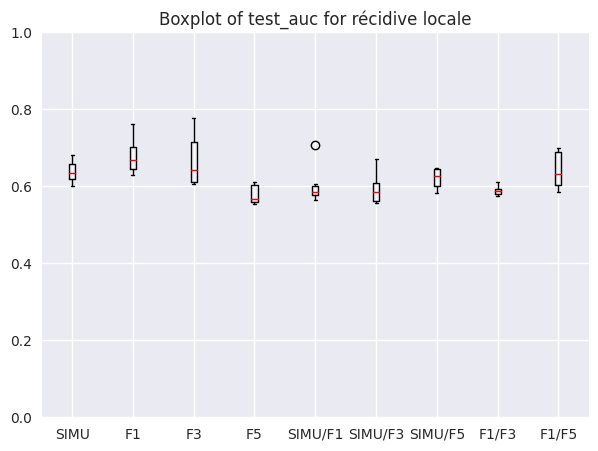

In [9]:
metric_list = ['test_auc']
rec_loc_top_res = af.get_best_results_dict2(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, metric_list, 'Récidive Locale', k=10)
# make a boxplot of rec_loc_top_res, rec_meta_top_res, deces_top_res with 
plt.style.use('seaborn-v0_8')
widths = 0.1
medianprops = dict(linestyle='-', linewidth=1, color='red')

nice_tables = ['SIMU', 'F1', 'F3',  'F5', 'SIMU/F1', 'SIMU/F3', 'SIMU/F5', 'F1/F3', 'F1/F5']


plt.figure(figsize=(24, 5))
i = 1
for metric in metric_list: 
    value_by_table = rec_loc_top_res[metric]
    plt.subplot(1, 3, i), plt.boxplot(value_by_table.values(), widths=widths, medianprops=medianprops), plt.title(f'Boxplot of {metric} for récidive locale'), plt.ylim([0, 1]), plt.xticks(range(1, len(delta_rad_tables) + 1), nice_tables), 
    i += 1

## Scatter plot

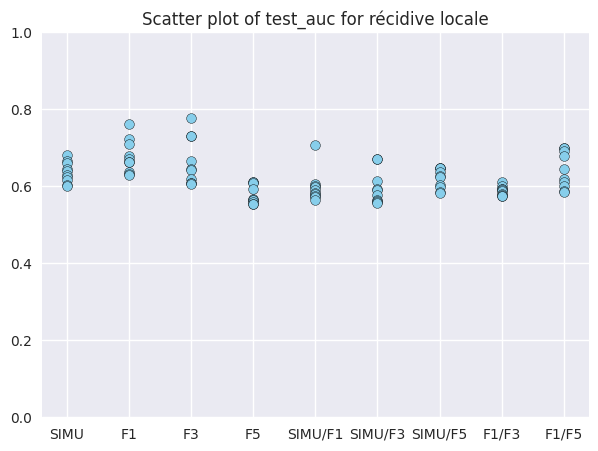

In [10]:
# make a scatter plot instead of a boxplot
plt.figure(figsize=(24, 5))
i = 1
for metric in metric_list: 
    value_by_table = rec_loc_top_res[metric]
    plt.subplot(1, 3, i)
    for j, table in enumerate(delta_rad_tables):
        data = value_by_table[table]
        x_values = np.full(len(data), j)  # Set x-values for this table (all points at x=j) 
        plt.scatter(x_values, data, color='skyblue', edgecolor='black')
    plt.title(f'Scatter plot of {metric} for récidive locale')
    plt.xticks(range(len(delta_rad_tables)), nice_tables)
    plt.ylim([0, 1])
    i += 1